# Linear Algebra

## PLU solve

In [1]:
import numpy as np
from scipy import linalg as la

In [2]:
A = np.array([[2,1,1], [2,1,-1],[1,3,1]])

In [3]:
A.shape

(3, 3)

In [4]:
P, L, U = la.lu(A)

In [5]:
def plusol (A, b):
    m,n = A.shape
    P, L, U = la.lu(A)
    y = np.zeros((m,1))
    c = np.dot (P,b)
    
    for j in range(m):
        y[j] = c[j] - np.dot(L[j, :j], y[:j])
        
    x = np.zeros((n,1))
    
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - np.dot(U[j, j+1:], x[j+1:])) / U[j, j]
    
    return x

In [6]:
b = np.array([[1],[1],[1]])
np.dot(A, plusol(A, b))

array([[1.],
       [1.],
       [1.]])

In [7]:
plusol(A, b)

array([[ 0.4],
       [ 0.2],
       [-0. ]])

In [8]:
np.dot(A, plusol(A, b))

array([[1.],
       [1.],
       [1.]])

In [9]:
import numpy as np

In [10]:
eig = np.linalg.eig

In [11]:
matrix = np.matrix([[4, -2], [1, 1]])

In [12]:
eigen = eig(matrix)
eigen

(array([3., 2.]), matrix([[0.89442719, 0.70710678],
         [0.4472136 , 0.70710678]]))

In [13]:
eigen_value = eigen[0]
print(eigen_value)

[3. 2.]


In [14]:
eigen_vector = eigen[1]
print(eigen_vector)

[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


In [15]:
print(eigen_vector[:,0] / eigen_vector[0, 0])

[[1. ]
 [0.5]]


In [16]:
inv = np.linalg.inv

In [17]:
inv(eigen_vector) * matrix * eigen_vector # inv(V)*A*(V)

matrix([[3., 0.],
        [0., 2.]])

In [18]:
A = np.array([[2,-3,1],[1,-2,1],[1,-3,2]])

In [19]:
eigen = eig(A)
eigen_value = eigen[0]
eigen_value

array([1.33226763e-15+0.00000000e+00j, 1.00000000e+00+8.74190484e-16j,
       1.00000000e+00-8.74190484e-16j])

In [20]:
eigen_vector = eigen[1]

In [21]:
eigen_vector

array([[-0.57735027+0.j        ,  0.81103583+0.j        ,
         0.81103583-0.j        ],
       [-0.57735027+0.j        ,  0.36250517-0.11591802j,
         0.36250517+0.11591802j],
       [-0.57735027+0.j        ,  0.27647967-0.34775407j,
         0.27647967+0.34775407j]])

In [22]:
A = np.array([[2,2],[1,1]])
u, s, v = np.linalg.svd(A)


In [23]:
u

array([[-0.89442719, -0.4472136 ],
       [-0.4472136 ,  0.89442719]])

## PCA practice (190719)

In [24]:
import pandas as pd # load data
dat = pd.read_csv('./2019-Summer-Samsung-DS2-master/wine.data', header=None)
dat.columns = ['Class label', 'Alcohol', 'Malic acid',
                   'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
dat.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
from sklearn.model_selection import train_test_split

X, y = dat.iloc[:, 1:].values, dat.iloc[:, 0].values
print(X.shape, y.shape)

(178, 13) (178,)


In [26]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,  # training 70%, test 30%
                                                    stratify = y, # label 관련
                                                    random_state = 0)

In [27]:
# data 전처리
from sklearn.preprocessing import StandardScaler # data를 적당하게 scaling 해줌
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
cov_mat.shape
print("Eigenvalues \n", eigen_vals)

Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [29]:
tot = sum(eigen_vals)
var_exp = [(val/tot) for val in sorted(eigen_vals, reverse=True)]


In [30]:
cum_var_exp = np.cumsum(var_exp)

In [31]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5,
       align = 'center', label = 'individual explained variance')
plt.step(range(1, 14), cum_var_exp, where = 'mid',
        label = 'cumulative explained variance')
plt.ylabel('Explained variacne ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

In [32]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse = True)
# Made and sorted the (eigenvalue, eigenvector) tuples from high to low eigenvalues

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


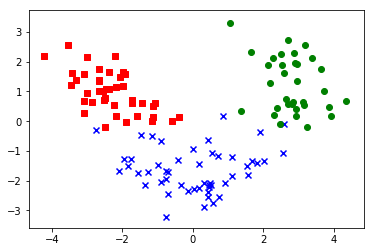

In [33]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c = c, label = l, marker = m)